In [ ]:
%cd /content
! rm -rf gan-tools
!git clone --single-branch --depth=1 --branch master https://github.com/hannesdm/gan-tools.git
%cd gan-tools
from keras.datasets import mnist
from keras import initializers
from keras.optimizers import RMSprop
import impl
from impl import *
from core import vis
from core import gan
from core import constraint
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['axes.grid'] = False


/content
Cloning into 'gan-tools'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 19 (delta 2), reused 11 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.
/content/gan-tools


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


## Wasserstein GAN
We will train a standard GAN and a Wasserstein GAN on the mnist data. <br/>
Both variants have a relatively simple fully connected architecture to allow for fast training. This will inevitable produce worse results than larger or specialized models (cfr. DCGAN). <br/>
The Wasserstein GAN implementation follows the paper of Arjovsky et al. <br/>
You may change the parameters and architecture of the model. If you do, do **not** change the **input_dim**,  **final layer** and **wasserstein_params**. <br/>
**Exercise** Compare the performance of the two GAN’s over
the different iterations, do you see an improvement in stability and quality of the generated samples? <br/>Elaborate based on
the knowledge you have gained about optimal transport and the Wasserstein distance.

In [ ]:
(X_train_mnist, Y_train_mnist), (_, _) = mnist.load_data()
X_train_mnist = X_train_mnist.reshape((-1, 28*28))
X_train_mnist = X_train_mnist.astype('float32') / 127.5 - 1

In [ ]:
kernel_initializer = initializers.RandomNormal(stddev=0.02)
weight_clipping = constraint.WeightClipping(c1=-0.01, c2=0.01)
wasserstein_params = {
    'kernel_initializer': kernel_initializer,
    'kernel_constraint': weight_clipping, 'bias_constraint': weight_clipping}

def mnist_generator_model():
  generator = Sequential()
  generator.add(Dense(100, input_dim=100, activation='relu'))
  generator.add(Dense(100, activation='relu'))
  generator.add(Dense(784, activation='tanh'))
  return generator

def mnist_discriminator_model():
  discriminator = Sequential()
  discriminator.add(Dense(100, input_dim=784, activation='relu'))
  discriminator.add(Dense(100, activation='relu'))
  discriminator.add(Dense(1, activation='sigmoid'))
  return discriminator

def mnist_wgan_generator_model():
  generator = Sequential()
  generator.add(Dense(100, input_dim=100, activation='relu'))
  generator.add(Dense(100, activation='relu'))
  generator.add(Dense(784, activation='tanh'))
  return generator

def mnist_wgan_discriminator_model():
  discriminator = Sequential()
  discriminator.add(Dense(100, input_dim=784, activation='relu', **wasserstein_params))
  discriminator.add(Dense(100, activation='relu', **wasserstein_params))
  discriminator.add(Dense(1, activation='linear', **wasserstein_params))
  return discriminator

## Train the standard GAN
The parameters **batches**, **batch_size** and **plot_interval** may be changed if wanted. <br/>
Remember that the execution may be interrupted at any time by clicking the stop button or by selecting the 'interrupt execution' option in the runtime menu.

  0%|          | 0/7000 [00:00<?, ?it/s]

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
Batch 1,   D loss: 0.9582 D acc: 0.5 G loss: 0.7988 G acc: 0.0:   0%|          | 0/7000 [00:01<?, ?it/s]

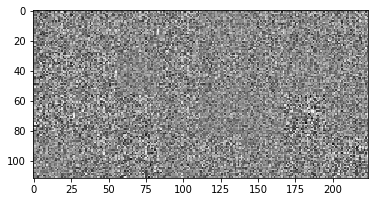

Batch 501,   D loss: 0.5936 D acc: 0.7812 G loss: 0.7774 G acc: 0.0:   7%|▋         | 500/7000 [00:13<02:32, 42.51it/s]

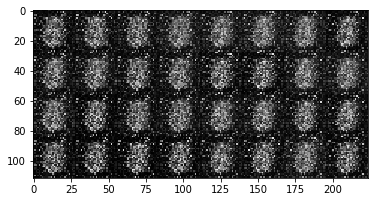

Batch 1001,   D loss: 0.5475 D acc: 0.7344 G loss: 1.2101 G acc: 0.0:  14%|█▍        | 1000/7000 [00:24<02:14, 44.54it/s]

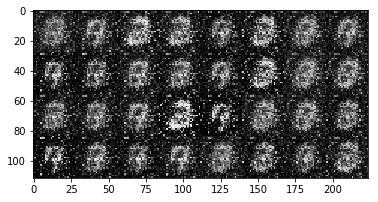

Batch 1501,   D loss: 0.5628 D acc: 0.6875 G loss: 0.943 G acc: 0.1406:  21%|██▏       | 1498/7000 [00:36<01:55, 47.83it/s]

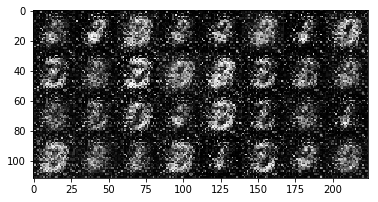

Batch 2001,   D loss: 0.5631 D acc: 0.7188 G loss: 1.1814 G acc: 0.0469:  29%|██▊       | 1996/7000 [00:47<01:46, 46.97it/s]

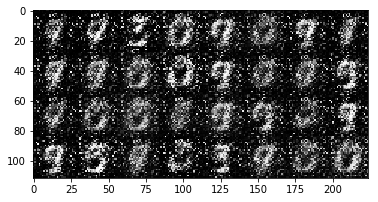

Batch 2501,   D loss: 0.5589 D acc: 0.7656 G loss: 0.9719 G acc: 0.0781:  36%|███▌      | 2496/7000 [00:58<01:36, 46.67it/s]

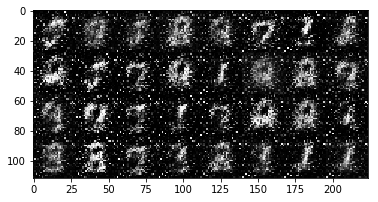

Batch 3001,   D loss: 0.4677 D acc: 0.7656 G loss: 1.4343 G acc: 0.0:  43%|████▎     | 3000/7000 [01:08<01:24, 47.54it/s]

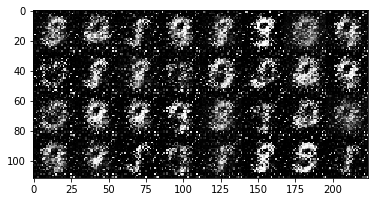

Batch 3501,   D loss: 0.4241 D acc: 0.8438 G loss: 2.0587 G acc: 0.0:  50%|████▉     | 3497/7000 [01:19<01:14, 47.10it/s]

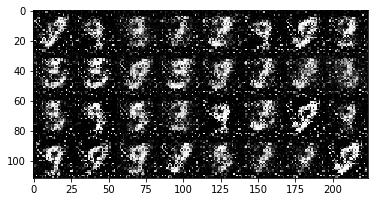

Batch 4001,   D loss: 0.3925 D acc: 0.8281 G loss: 1.7166 G acc: 0.0469:  57%|█████▋    | 3998/7000 [01:30<01:00, 49.66it/s]

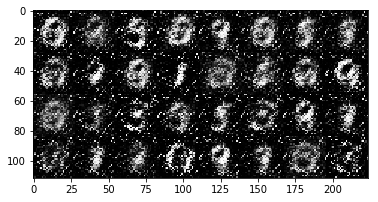

Batch 4501,   D loss: 0.4217 D acc: 0.8281 G loss: 1.6143 G acc: 0.0:  64%|██████▍   | 4499/7000 [01:41<00:52, 47.84it/s]   

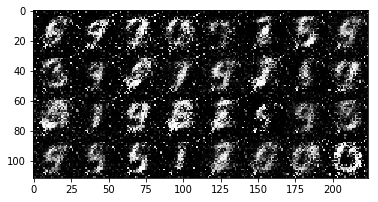

Batch 5001,   D loss: 0.4438 D acc: 0.75 G loss: 1.5962 G acc: 0.0156:  71%|███████▏  | 4999/7000 [01:52<00:42, 47.20it/s]  

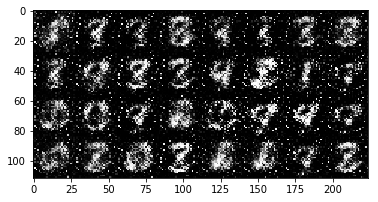

Batch 5501,   D loss: 0.3877 D acc: 0.8594 G loss: 1.9952 G acc: 0.0:  79%|███████▊  | 5498/7000 [02:02<00:31, 47.51it/s]

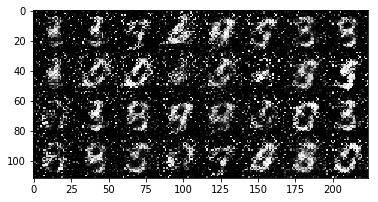

Batch 6001,   D loss: 0.2924 D acc: 0.9375 G loss: 2.0967 G acc: 0.0:  86%|████████▌ | 5999/7000 [02:13<00:21, 47.66it/s]

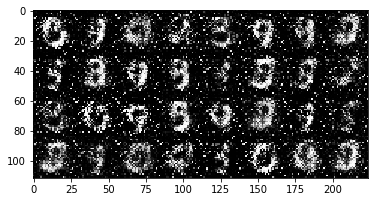

Batch 6501,   D loss: 0.4806 D acc: 0.7656 G loss: 1.9904 G acc: 0.0:  93%|█████████▎| 6495/7000 [02:24<00:10, 49.09it/s]   

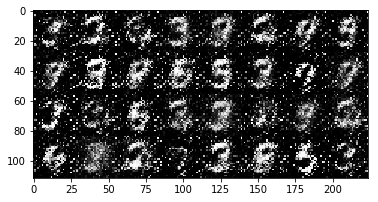

Batch 7000,   D loss: 0.5749 D acc: 0.7812 G loss: 2.2798 G acc: 0.0: 100%|██████████| 7000/7000 [02:34<00:00, 45.26it/s]


In [ ]:
mnist_gan = GAN(discriminator=mnist_discriminator_model(), generator=mnist_generator_model())
mnist_gan.train_random_batches(X_train_mnist, batches = 7000, batch_size=32, plot_interval = 500, image_shape=(28,28))

## Train the Wasserstein GAN
The parameters **batches**, **batch_size** and **plot_interval** may be changed if wanted. <br/>
Remember that the execution may be interrupted at any time by clicking the stop button or by selecting the 'interrupt execution' option in the runtime menu.

  0%|          | 0/7000 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
Batch 1,   D loss: -0.0009 D acc: 0.0 G loss: 0.0003 G acc: 0.0:   0%|          | 0/7000 [00:01<?, ?it/s]

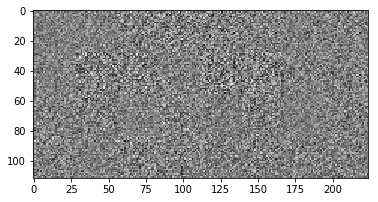

Batch 501,   D loss: -0.0241 D acc: 0.5 G loss: -1.0782 G acc: 0.0:   7%|▋         | 498/7000 [00:25<05:06, 21.19it/s]

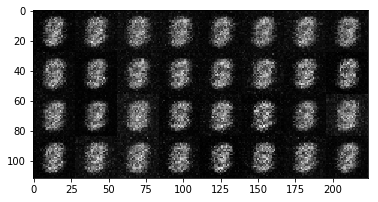

Batch 1001,   D loss: 0.0112 D acc: 0.5 G loss: -0.5216 G acc: 0.0:  14%|█▍        | 998/7000 [00:48<04:33, 21.96it/s]

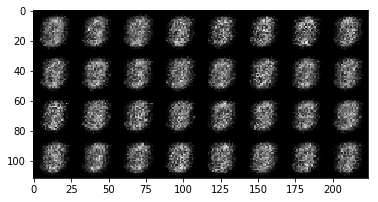

Batch 1501,   D loss: -0.0531 D acc: 0.0 G loss: -0.0882 G acc: 0.0:  21%|██▏       | 1500/7000 [01:12<04:34, 20.04it/s]

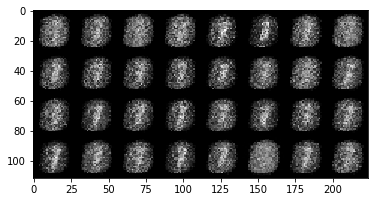

Batch 2001,   D loss: -0.0857 D acc: 0.0 G loss: -0.0291 G acc: 0.0:  29%|██▊       | 1998/7000 [01:35<03:49, 21.81it/s]

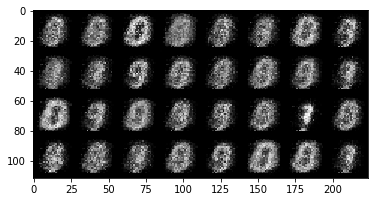

Batch 2501,   D loss: -0.0629 D acc: 0.0 G loss: -0.0095 G acc: 0.0:  36%|███▌      | 2498/7000 [01:58<03:29, 21.47it/s]

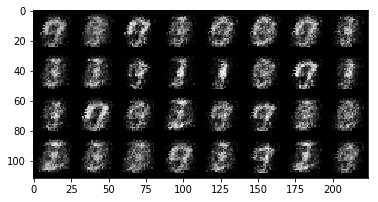

Batch 3001,   D loss: -0.0404 D acc: 0.0 G loss: -0.0778 G acc: 0.0:  43%|████▎     | 3000/7000 [02:22<03:00, 22.17it/s]

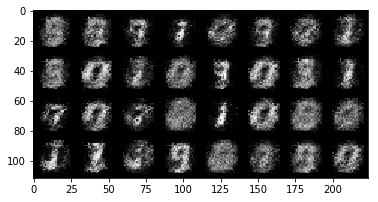

Batch 3501,   D loss: -0.0494 D acc: 0.0 G loss: -0.043 G acc: 0.0:  50%|████▉     | 3498/7000 [02:45<02:34, 22.73it/s] 

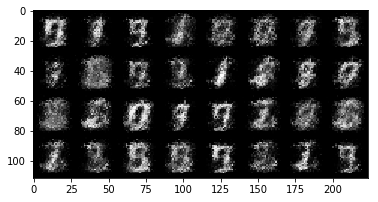

Batch 4001,   D loss: -0.0605 D acc: 0.0 G loss: -0.0142 G acc: 0.0:  57%|█████▋    | 3999/7000 [03:09<02:18, 21.61it/s]

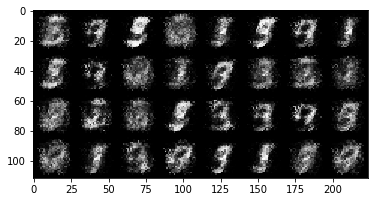

Batch 4501,   D loss: -0.0353 D acc: 0.0 G loss: -0.0624 G acc: 0.0:  64%|██████▍   | 4500/7000 [03:32<01:49, 22.80it/s]

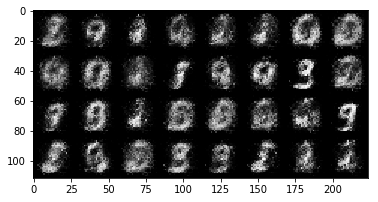

Batch 5001,   D loss: -0.0507 D acc: 0.0 G loss: -0.0247 G acc: 0.0:  71%|███████▏  | 4998/7000 [03:55<01:29, 22.25it/s]

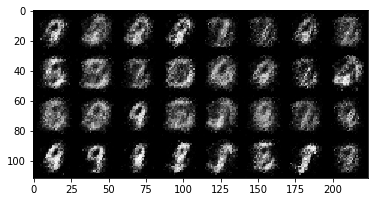

Batch 5501,   D loss: -0.0367 D acc: 0.0 G loss: -0.0449 G acc: 0.0:  79%|███████▊  | 5498/7000 [04:18<01:09, 21.59it/s]

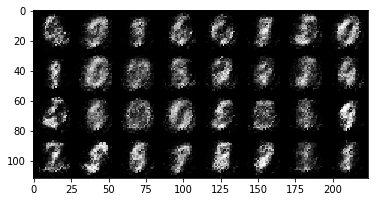

Batch 6001,   D loss: -0.047 D acc: 0.0 G loss: -0.041 G acc: 0.0:  86%|████████▌ | 5998/7000 [04:41<00:44, 22.40it/s]  

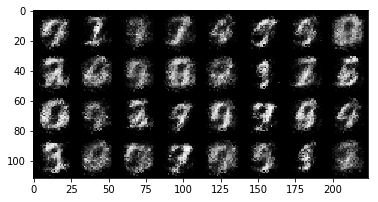

Batch 6501,   D loss: -0.0349 D acc: 0.0 G loss: -0.0649 G acc: 0.0:  93%|█████████▎| 6498/7000 [05:04<00:23, 21.61it/s]

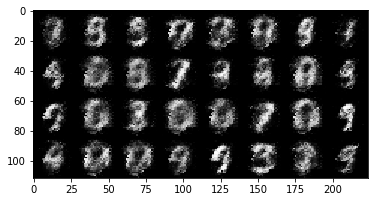

Batch 7000,   D loss: -0.0519 D acc: 0.0 G loss: -0.0265 G acc: 0.0: 100%|██████████| 7000/7000 [05:27<00:00, 21.34it/s]


In [ ]:
optimizer = RMSprop(lr=0.00005)
mnist_wgan = GAN(discriminator=mnist_wgan_discriminator_model(), generator=mnist_wgan_generator_model()
                 ,generator_optimizer=optimizer, discriminator_optimizer=optimizer, loss='wasserstein')
mnist_wgan.train_random_batches(X_train_mnist, batches=7000, batch_size=32,
                                plot_interval = 500, image_shape=(28,28), nr_train_discriminator=5) 